In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler

In [5]:
dataset_dir = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(''))), 'datasets')


In [6]:
data_2017 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2017.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')
data_2018 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2018.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')
data_2019 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2019.csv'),  parse_dates=['llamado_fecha_hora'], encoding='latin-1')
data_2020 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2020.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')
data_2021 =pd.read_csv(os.path.join(dataset_dir,'csv/llamados_atendidos_abuso_sexual_2021.csv'),  parse_dates=['llamado_fecha_hora'], engine= 'python')


## 1. Antes de concatenar todos los años

1.1 Comparo los nombres de las columnas de cada año (para eso armo un df_columnas)

In [14]:
# Calling DataFrame constructor after zipping
# both lists, with columns specified
df_columnas = pd.DataFrame(list(zip(data_2017.columns, data_2018.columns, data_2019, data_2020.columns, data_2021.columns)),
               columns =['2017', '2018', '2019', '2020', '2021'])
#df_columnas

1.2 Lo primero que se nota es la inconsistencia de la variable caso_id que solo existe desde 2019. Quito la variable. 

In [15]:
data_2019.drop('caso_id',
  axis='columns', inplace=True)
data_2020.drop('caso_id',
  axis='columns', inplace=True)
data_2021.drop('caso_id',
  axis='columns', inplace=True)


In [16]:
df_columnas = pd.DataFrame(list(zip(data_2017.columns, data_2018.columns, data_2019, data_2020.columns, data_2021.columns)),
               columns =['2017', '2018', '2019', '2020', '2021'])
# df_columnas

In [17]:
print(data_2021.columns == data_2017.columns)
print(data_2021.columns == data_2018.columns)
print(data_2021.columns == data_2019.columns)
print(data_2021.columns == data_2020.columns)


[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False]
[ True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False]
[ True  Tr

### cambios de nombres de columnas:
2017 2018 llamante_quien_llama == llamante_vinculo

2017 2018 2019 llamado_provincia_indec_id == llamado_provincia_id

además separo fecha_hora y fecha y hora

In [7]:
data_2017.rename(columns = {'llamante_quien_llama': 'llamante_vinculo', 'llamado_provincia_indec_id': 'llamado_provincia_id'}, inplace = True)
data_2018.rename(columns = {'llamante_quien_llama': 'llamante_vinculo', 'llamado_provincia_indec_id': 'llamado_provincia_id'}, inplace = True)
data_2019.rename(columns = {'llamado_provincia_indec_id': 'llamado_provincia_id'}, inplace = True)



### Creación dataset a: unión de todos los años con arreglos de nombres de columnas

In [8]:
dataset_a = pd.concat([data_2017, data_2018, data_2019, data_2020, data_2021])


In [12]:
dataset_a.to_excel('dataset_a.xlsx', index=False)


In [9]:
dataset_a['llamado_fecha'] = pd.to_datetime(dataset_a['llamado_fecha_hora'], errors='coerce').dt.date
dataset_a['llamado_hora'] = pd.to_datetime(dataset_a['llamado_fecha_hora'], errors='coerce').dt.time

In [55]:
dataset_a.head()

,llamado_fecha_hora,llamado_provincia,llamante_edad,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,victima_a_resguardo,victima_edad,victima_genero,...,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta,llamado_provincia_id,llamado_fecha,llamado_hora
0,2016-11-19 12:46:38,Misiones,30,Femenino,Hospital,NS/NC,Vivienda de la Víctima,SI,12,Femenino,...,NO,NO,NO,NO,NO,NO,NO,54.0,2016-11-19,12:46:38
1,2016-11-19 13:46:24,Ciudad Autónoma de Buenos Aires,Sin dato,Femenino,Madre,NS/NC,Vivienda de la Víctima,SI,11,Masculino,...,NO,NO,NO,NO,NO,SI,NO,2.0,2016-11-19,13:46:24
2,2016-11-19 18:20:08,Tucumán,47,Femenino,Víctima,NS/NC,Vivienda de la Víctima,SI,47,Femenino,...,NO,NO,NO,NO,NO,NO,NO,90.0,2016-11-19,18:20:08
3,2016-11-20 00:05:55,Santa Fé,Sin dato,Masculino,Vecino,NS/NC,Vivienda de la Víctima,NO,11,Femenino,...,NO,NO,NO,NO,NO,NO,NO,82.0,2016-11-20,00:05:55
4,2016-11-20 00:05:55,Santa Fé,Sin dato,Masculino,Vecino,NS/NC,Vivienda de la Víctima,NO,12,Femenino,...,NO,NO,NO,NO,NO,NO,NO,82.0,2016-11-20,00:05:55


### Creación del dataset_b, con fecha y hora separadas y con las columnas ordenadas de manera más intuitiva

In [10]:
dataset_b = dataset_a[['llamado_fecha_hora', 
                                   'llamado_fecha', 
                                   'llamado_hora', 
                                   'llamado_provincia', 
                                   'llamado_provincia_id',
                                   'llamante_edad',
                                   'llamante_genero', 
                                   'llamante_vinculo', 
                                   'caso_judicializado',
                                   'hecho_lugar', 
                                   'victima_a_resguardo', 
                                   'victima_edad', 
                                   'victima_genero',
       'victima_nacionalidad', 'victima_vinculo_agresor',
       'victima_discapacidad', 'victima_convive_agresor',
       'vs_violacion_via_vaginal', 'vs_violacion_via_anal',
       'vs_violacion_via_oral', 'vs_tentativa_violacion',
       'vs_tocamiento_sexual', 'vs_intento_tocamiento',
       'vs_Intento_violación_tercera_persona', 'vs_grooming',
       'vs_exhibicionismo', 'vs_amenazas_verbales_contenido_sexual',
       'vs_explotacion_sexual', 'vs_explotacion_sexual_comercial',
       'vs_explotacion_sexual_viajes_turismo',
       'vs_sospecha_trata_personas_fines_sexuales',
       'vs_existencia_facilitador_corrupcion_nnya',
       'vs_obligacion_sacarse_fotos_pornograficas',
       'vs_eyaculacion_partes_cuerpo', 'vs_acoso_sexual',
       'vs_iniciacion_sexual_forzada_inducida',
       'vs_otra_forma_violencia_sexual', 'vs_no_sabe_no_contesta',
       'ofv_sentimiento_amenaza', 'ofv_amenaza_explicita',
       'ofv_violencia_fisica', 'ofv_intento_ahorcar', 'ofv_intento_quemar',
       'ofv_intento_ahogar', 'ofv_amenaza_muerte',
       'ofv_uso_sustancias_psicoactivas', 'ofv_intento_privacion_libertad',
       'ofv_privacion_libertad', 'ofv_uso_arma_blanca', 'ofv_uso_arma_fuego',
       'ofv_enganio_seduccion', 'ofv_intento_matar',
       'ofv_uso_animal_victimizar', 'ofv_grooming', 'ofv_otra_forma_violencia',
       'ofv_no_sabe_no_contesta']]


In [58]:
dataset_b.to_excel('dataset_b.xlsx', index=False)


In [11]:
dataset_b['llamado_fecha'].isnull().sum()

0

In [12]:
dataset_b['llamado_hora'].isnull().sum()

0

### Chequear el type de las variables

(todos dan object menos id provincia que da integer)

In [59]:
# dataset_a.dtypes

In [26]:
#dataset_b.dtypes

### Pasar las columnas  a categorical 

In [14]:
dataset_c = dataset_b.copy(deep=True)

In [28]:
indexes = np.arange(12, 56) # armo un array con los índices de columnas categóricas que vienen después de la última de edad

In [29]:
indexes

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55])

In [30]:
for i in indexes:
    dataset_c.iloc[:, i] = dataset_c.iloc[:, i].astype('category')


In [31]:
# ahora son todas category menos las que van del 0 al 11 que las voy a cambiar a mano
dataset_c.dtypes

llamado_fecha_hora                             object
llamado_fecha                                  object
llamado_hora                                   object
llamado_provincia                              object
llamado_provincia_id                          float64
llamante_edad                                  object
llamante_genero                                object
llamante_vinculo                               object
caso_judicializado                             object
hecho_lugar                                    object
victima_a_resguardo                            object
victima_edad                                   object
victima_genero                               category
victima_nacionalidad                         category
victima_vinculo_agresor                      category
victima_discapacidad                         category
victima_convive_agresor                      category
vs_violacion_via_vaginal                     category
vs_violacion_via_anal       

### Columnas a cambiar a mano:

                                 
- llamado_provincia
- llamado_provincia_id                          
- llamante_edad                                  
- llamante_genero                                
- llamante_vinculo                               
- caso_judicializado                             
- hecho_lugar                                    
- victima_a_resguardo                            

In [15]:
# para las que están mezcladas (las que vienen antes del índice 12) las cambio a mano
dataset_c = dataset_c.astype({'llamado_provincia': 'category','llamado_provincia_id': 'category',
           'llamante_genero': 'category','llamante_vinculo': 'category',
           'caso_judicializado': 'category','hecho_lugar' : 'category',
           'victima_a_resguardo': 'category' })

In [33]:
dataset_c.dtypes

llamado_fecha_hora                             object
llamado_fecha                                  object
llamado_hora                                   object
llamado_provincia                            category
llamado_provincia_id                         category
llamante_edad                                  object
llamante_genero                              category
llamante_vinculo                             category
caso_judicializado                           category
hecho_lugar                                  category
victima_a_resguardo                          category
victima_edad                                   object
victima_genero                               category
victima_nacionalidad                         category
victima_vinculo_agresor                      category
victima_discapacidad                         category
victima_convive_agresor                      category
vs_violacion_via_vaginal                     category
vs_violacion_via_anal       

### valores numéricos: type integer

- llamante edad as integer y sin datos = NA
- victima edad as integer y sin datos = NA
- provincia id as integer y sin datos = NA

In [16]:
#dataset_b['victima_edad'] = pd.to_numeric(dataset_b['victima_edad'], errors='coerce')
dataset_c['victima_edad'] = pd.to_numeric(dataset_c['victima_edad'], errors='coerce').convert_dtypes()
#dataset_b['llamante_edad'] = pd.to_numeric(dataset_b['llamante_edad'], errors='coerce')
dataset_c['llamante_edad'] = pd.to_numeric(dataset_c['llamante_edad'], errors='coerce').convert_dtypes() 


In [35]:
dataset_c['victima_edad']

0       12
1       11
2       47
3       11
4       12
        ..
3304     8
3305    23
3306    13
3307    15
3308     5
Name: victima_edad, Length: 19143, dtype: Int64

In [36]:
dataset_c.dtypes

llamado_fecha_hora                             object
llamado_fecha                                  object
llamado_hora                                   object
llamado_provincia                            category
llamado_provincia_id                         category
llamante_edad                                   Int64
llamante_genero                              category
llamante_vinculo                             category
caso_judicializado                           category
hecho_lugar                                  category
victima_a_resguardo                          category
victima_edad                                    Int64
victima_genero                               category
victima_nacionalidad                         category
victima_vinculo_agresor                      category
victima_discapacidad                         category
victima_convive_agresor                      category
vs_violacion_via_vaginal                     category
vs_violacion_via_anal       

In [37]:
dataset_c.to_excel('dataset_c.xlsx', index=False)


In [44]:
dataset_d = dataset_c.copy(deep=True)

##  Normalizaciones de errores en carga de datos

- ver todas las cat: llamado_provincia, llamante_vinculo, hecho_lugar, victima_nacionalidad, victima_vinculo_agresor

- en todo el dataset Ns/Nc = NS/NC
- llamante_edad Sin dato pasar a N/A
- llamante género: Masculino = Masculino Trans = Transgénero
- llamante vinculo Vecino = Vecina/o ' Madre' = 'Madre'
- caso judicializado 'NS/NS' = 'NS/NC' 'Sin datos' = 'NS/NC'
- victima_a_resguardo No = NO
- victima_genero Trans = Transgénero
- victima_vinculo_agresor 'Pareja de la vícitma' = 'Pareja de la víctima' 'Pareja ' = 'Pareja de la víctima'  Ex pareja = Ex pareja de la víctima
- hecho_lugar Otro(Especificar en observaciones) = Otro 
- llamado_provincia: 'Ciudad Autónoma de Buenos Aires' = 'CABA'
- llamado_provincia: 'Santa Fé' = 'Santa Fe'


In [ ]:
dataset_d.llamante_genero.replace({' Masculino':'Masculino', 'Trans':'Transgénero'}, inplace = True)
dataset_d.llamante_vinculo.replace({'Vecino': 'Vecina/o', ' Madre':'Madre'}, inplace = True)
dataset_d.victima_a_resguardo.replace({'No': 'NO'}, inplace = True)
dataset_d.victima_genero.replace({'Trans': 'Transgénero'}, inplace = True)
dataset_d.victima_vinculo_agresor.replace({'Pareja de la vícitma': 'Pareja de la víctima', 'Pareja ': 'Pareja de la víctima','Pareja': 'Pareja de la víctima', 'Ex pareja': 'Ex pareja de la víctima'}, inplace = True)
dataset_d.hecho_lugar.replace({'Otro(Especificar en observaciones)': 'Otro' }, inplace = True)
dataset_d.caso_judicializado.replace({'NS/NS': 'NS/NC', 'Sin datos':'NS/NC'}, inplace = True)
dataset_d.llamado_provincia.replace({'Ciudad Autónoma de Buenos Aires': 'CABA'}, inplace = True)
dataset_d.llamado_provincia.replace({'Santa Fé': 'Santa Fe'}, inplace = True)
dataset_d.replace('Ns/Nc', 'NS/NC', inplace=True)

## Outliers de error de carga

In [19]:
print('filas con edad llamante + 100: ', len(dataset_d.loc[dataset_d['llamante_edad'] >= 100, 'llamante_edad'])) 
print('filas con edad llamante -3: ', len(dataset_d.loc[dataset_d['llamante_edad'] < 3, 'llamante_edad']))


print('filas con edad victima + 103: ', len(dataset_d.loc[dataset_d['victima_edad'] >= 103, 'victima_edad']))
print('filas con edad victima menor a 0: ', len(dataset_d.loc[dataset_d['victima_edad'] < 0, 'victima_edad']))

filas con edad llamante + 100:  192
filas con edad llamante -3:  3
filas con edad victima + 103:  101
filas con edad victima menor a 0:  0


In [49]:
dataset_d = dataset_d.reset_index(drop=True)

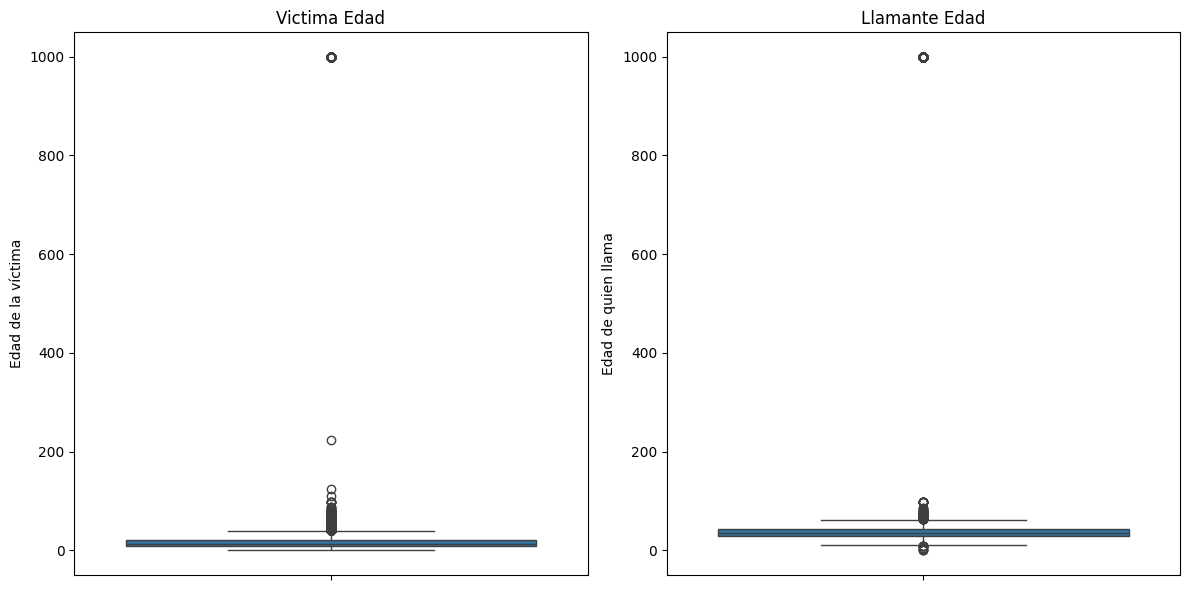

In [55]:
#Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for victima_edad
sns.boxplot(y='victima_edad', data=dataset_d, ax=ax[0])
ax[0].set_title('Victima Edad')
ax[0].set_ylabel('Edad de la víctima') 

# Boxplot for llamante_edad
sns.boxplot(y='llamante_edad', data=dataset_d, ax=ax[1])
ax[1].set_title('Llamante Edad')
ax[1].set_ylabel('Edad de quien llama') 

# Adjust the layout
plt.tight_layout()
plt.show()

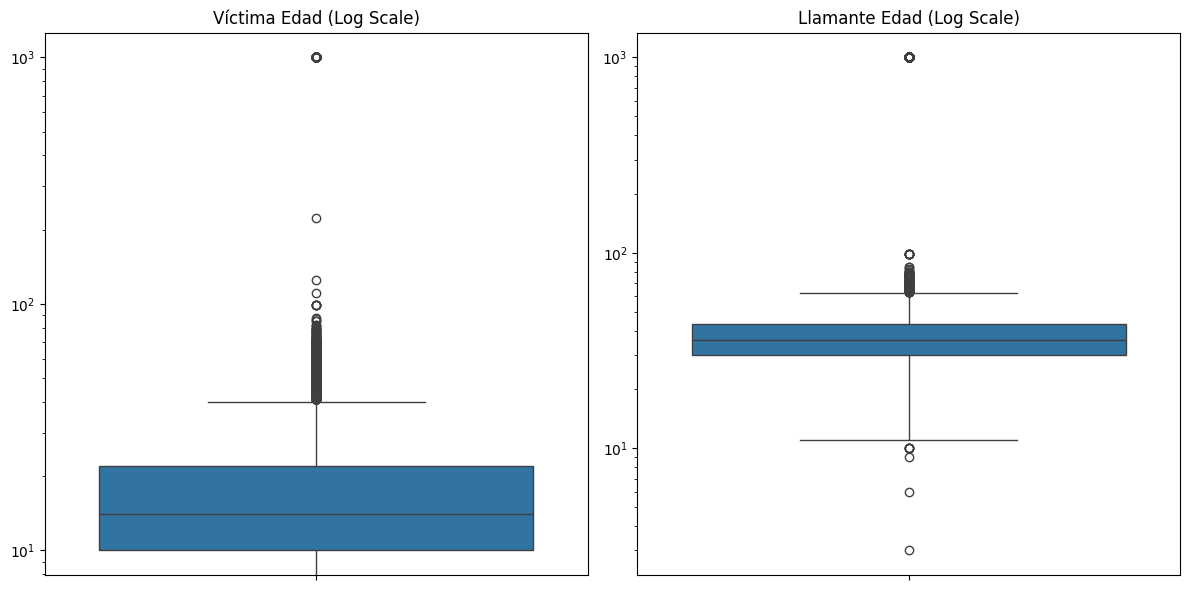

In [57]:
# Create the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for victima_edad with log scale
sns.boxplot(y='victima_edad', data=dataset_d, ax=ax[0])
ax[0].set_yscale('log')
ax[0].set_title('Víctima Edad (Log Scale)')
ax[0].set_ylabel('')  

# Boxplot for llamante_edad with log scale
sns.boxplot(y='llamante_edad', data=dataset_d, ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_title('Llamante Edad (Log Scale)')
ax[1].set_ylabel('') 

# Adjust the layout
plt.tight_layout()
plt.show()

In [ ]:
dataset_d.loc[dataset_d['llamante_edad'] < 3, 'llamante_edad'].unique()

In [ ]:
dataset_d.loc[dataset_d['victima_edad'] >= 103, 'victima_edad'].unique()

In [ ]:
len(dataset_d.loc[dataset_d['victima_edad'] == 125, 'victima_edad'])

In [ ]:
dataset_d.loc[dataset_d['llamante_edad'] >= 100, 'llamante_edad'].unique()

In [40]:
dataset_d['llamante_edad'].loc[(dataset_d['llamante_edad'] >= 100)] = None
dataset_d['llamante_edad'].loc[(dataset_d['llamante_edad'] < 3)] = None

In [41]:
dataset_d['victima_edad'].loc[(dataset_d['victima_edad'] >= 103)] = None
dataset_d['victima_edad'].loc[(dataset_d['victima_edad'] < 0)] = None
# el límite para abajo solo es negativo

In [42]:
dataset_d['victima_edad']

0       12
1       11
2       47
3       11
4       12
        ..
3304     8
3305    23
3306    13
3307    15
3308     5
Name: victima_edad, Length: 19143, dtype: Int64

In [63]:
dataset_d.isnull().sum()

llamado_fecha_hora                              0
llamado_fecha                                   0
llamado_hora                                    0
llamado_provincia                               0
llamado_provincia_id                         1793
llamante_edad                                8580
llamante_genero                                 0
llamante_vinculo                                0
caso_judicializado                              0
hecho_lugar                                     0
victima_a_resguardo                             0
victima_edad                                 1880
victima_genero                                 22
victima_nacionalidad                            0
victima_vinculo_agresor                         0
victima_discapacidad                            0
victima_convive_agresor                         0
vs_violacion_via_vaginal                        0
vs_violacion_via_anal                           0
vs_violacion_via_oral                           0


In [45]:
# guardo normalizado

dataset_d.to_excel('dataset_d_normf.xlsx', index=False)


In [48]:
dataset_d.head()

,llamado_fecha_hora,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id,llamante_edad,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
0,2016-11-19 12:46:38,2016-11-19,12:46:38,Misiones,54.0,30,Femenino,Hospital,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,2016-11-19 13:46:24,2016-11-19,13:46:24,CABA,2.0,<NA>,Femenino,Madre,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO
2,2016-11-19 18:20:08,2016-11-19,18:20:08,Tucumán,90.0,47,Femenino,Víctima,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO


In [49]:
# volver a levantar especificando dtype:
llamados_entero = pd.read_excel('dataset_d_normf.xlsx',
                               dtype= {'llamado_fecha_hora': 'datetime64[ns]','llamado_fecha': 'datetime64[ns]', 'llamado_provincia': 'category','llamado_provincia_id': 'category','llamante_edad': 'Int64','llamante_genero': 'category','llamante_vinculo': 'category','caso_judicializado': 'category','hecho_lugar': 'category','victima_a_resguardo': 'category','victima_edad': 'Int64','victima_genero': 'category','victima_nacionalidad': 'category','victima_vinculo_agresor': 'category','victima_discapacidad': 'category','victima_convive_agresor': 'category','vs_violacion_via_vaginal': 'category','vs_violacion_via_anal': 'category','vs_violacion_via_oral': 'category','vs_tentativa_violacion': 'category','vs_tocamiento_sexual': 'category','vs_intento_tocamiento': 'category','vs_Intento_violación_tercera_persona': 'category','vs_grooming': 'category','vs_exhibicionismo': 'category','vs_amenazas_verbales_contenido_sexual': 'category','vs_explotacion_sexual': 'category','vs_explotacion_sexual_comercial': 'category','vs_explotacion_sexual_viajes_turismo': 'category','vs_sospecha_trata_personas_fines_sexuales': 'category','vs_existencia_facilitador_corrupcion_nnya': 'category','vs_obligacion_sacarse_fotos_pornograficas': 'category','vs_eyaculacion_partes_cuerpo': 'category','vs_acoso_sexual': 'category','vs_iniciacion_sexual_forzada_inducida': 'category','vs_otra_forma_violencia_sexual': 'category','vs_no_sabe_no_contesta': 'category','ofv_sentimiento_amenaza': 'category','ofv_amenaza_explicita': 'category','ofv_violencia_fisica': 'category','ofv_intento_ahorcar': 'category','ofv_intento_quemar': 'category','ofv_intento_ahogar': 'category','ofv_amenaza_muerte': 'category','ofv_uso_sustancias_psicoactivas': 'category','ofv_intento_privacion_libertad': 'category','ofv_privacion_libertad': 'category','ofv_uso_arma_blanca': 'category','ofv_uso_arma_fuego': 'category','ofv_enganio_seduccion': 'category','ofv_intento_matar': 'category','ofv_uso_animal_victimizar': 'category','ofv_grooming': 'category','ofv_otra_forma_violencia': 'category','ofv_no_sabe_no_contesta': 'category'})

In [50]:
llamados_entero.head()

,llamado_fecha_hora,llamado_fecha,llamado_hora,llamado_provincia,llamado_provincia_id,llamante_edad,llamante_genero,llamante_vinculo,caso_judicializado,hecho_lugar,...,ofv_intento_privacion_libertad,ofv_privacion_libertad,ofv_uso_arma_blanca,ofv_uso_arma_fuego,ofv_enganio_seduccion,ofv_intento_matar,ofv_uso_animal_victimizar,ofv_grooming,ofv_otra_forma_violencia,ofv_no_sabe_no_contesta
0,2016-11-19 12:46:38,2016-11-19,12:46:38,Misiones,54.0,30,Femenino,Hospital,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,2016-11-19 13:46:24,2016-11-19,13:46:24,CABA,2.0,<NA>,Femenino,Madre,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO
2,2016-11-19 18:20:08,2016-11-19,18:20:08,Tucumán,90.0,47,Femenino,Víctima,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
3,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
4,2016-11-20 00:05:55,2016-11-20,00:05:55,Santa Fe,82.0,<NA>,Masculino,Vecina/o,NS/NC,Vivienda de la Víctima,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO
